# GradCam
https://gist.github.com/RaphaelMeudec/e9a805fa82880876f8d89766f0690b54

https://www.sicara.ai/blog/2019-08-28-interpretability-deep-learning-tensorflow

## Libraries

In [1]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import colorbar

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

from matplotlib import pyplot
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow.keras.backend as K

from numpy import expand_dims
#import cv2

## Get trained model

In [2]:
# load the model
model = load_model('save_models/keras_valid0.78050Train0.79153.h5')
# summarize the model
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 300, 128)          768       
_________________________________________________________________
activation_120 (Activation)  (None, 300, 128)          0         
_________________________________________________________________
dropout_120 (Dropout)        (None, 300, 128)          0         
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 300, 16)           10256     
_________________________________________________________________
activation_121 (Activation)  (None, 300, 16)           0         
_________________________________________________________________
dropout_121 (Dropout)        (None, 300, 16)           0         
_________________________________________________________________
conv1d_98 (Conv1D)           (None, 300, 8)          

## Get waves to predict - Just 1 example

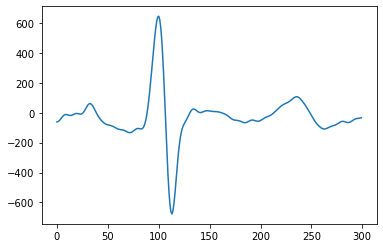

(300, 1)

In [3]:
#real_class = 0
#original_beat = np.asarray([[-3.55802957e+01],[-3.84949308e+01],[-4.04914835e+01],[-4.12181815e+01],[-4.05803908e+01],[-3.88027494e+01],[-3.64115343e+01],[-3.41323921e+01],[-3.27213790e+01],[-3.27669159e+01],[-3.45111655e+01],[-3.77380450e+01],[-4.17614207e+01],[-4.55240067e+01],[-4.77908454e+01],[-4.73976939e+01],[-4.35002729e+01],[-3.57688536e+01],[-2.44844767e+01],[-1.05152028e+01],[ 4.82235868e+00],[ 1.99860349e+01],[ 3.34682050e+01],[ 4.40400286e+01],[ 5.09333357e+01],[ 5.39300919e+01],[ 5.33508531e+01],[ 4.99547392e+01],[ 4.47792645e+01],[ 3.89558797e+01],[ 3.35357360e+01],[ 2.93518127e+01],[ 2.69315026e+01],[ 2.64617675e+01],[ 2.78001386e+01],[ 3.05204912e+01],[ 3.39824487e+01],[ 3.74157170e+01],[ 4.00133852e+01],[ 4.10293621e+01],[ 3.98738565e+01],[ 3.61977966e+01],[ 2.99540164e+01],[ 2.14220772e+01],[ 1.11864175e+01],[ 6.45267796e-02],[-1.10080941e+01],[-2.11188273e+01],[-2.95193414e+01],[-3.57395218e+01],[-3.96501375e+01],[-4.14609127e+01],[-4.16550742e+01],[-4.08759931e+01],[-3.97923320e+01],[-3.89721450e+01],[-3.87925563e+01],[-3.94011617e+01],[-4.07312127e+01],[-4.25590830e+01],[-4.45832793e+01],[-4.65017971e+01],[-4.80691108e+01],[-4.91236067e+01],[-4.95872936e+01],[-4.94483867e+01],[-4.87409862e+01],[-4.75336055e+01],[-4.59310502e+01],[-4.40851598e+01],[-4.22030004e+01],[-4.05393040e+01],[-3.93645259e+01],[-3.89096302e+01],[-3.93002046e+01],[-4.05012619e+01],[-4.22960958e+01],[-4.43157878e+01],[-4.61213480e+01],[-4.73219598e+01],[-4.76963016e+01],[-4.72755796e+01],[-4.63510297e+01],[-4.53859547e+01],[-4.48394020e+01],[-4.49382828e+01],[-4.54581957e+01],[-4.55823551e+01],[-4.38981151e+01],[-3.85619895e+01],[-2.76227770e+01],[-9.44862822e+00],[ 1.68304415e+01],[ 5.09676933e+01],[ 9.14248175e+01],[ 1.35434341e+02],[ 1.79304719e+02],[ 2.18917573e+02],[ 2.50320798e+02],[ 2.70297718e+02],[ 2.76797771e+02],[ 2.69147322e+02],[ 2.48011770e+02],[ 2.15138546e+02],[ 1.72959760e+02],[ 1.24160398e+02],[ 7.13164793e+01],[ 1.66786169e+01],[-3.78712937e+01],[-9.07154636e+01],[-1.40316028e+02],[-1.85041154e+02],[-2.23085351e+02],[-2.52536620e+02],[-2.71595500e+02],[-2.78900994e+02],[-2.73879957e+02],[-2.57020880e+02],[-2.29984686e+02],[-1.95501391e+02],[-1.57052701e+02],[-1.18393447e+02],[-8.30053597e+01],[-5.35947376e+01],[-3.17366605e+01],[-1.77352536e+01],[-1.07207722e+01],[-8.95227380e+00],[-1.02519069e+01],[-1.24730096e+01],[-1.39038628e+01],[-1.35305250e+01],[-1.11191919e+01],[-7.12117319e+00],[-2.44162824e+00],[ 1.86151837e+00],[ 4.87405545e+00],[ 6.05212089e+00],[ 5.33623695e+00],[ 3.13927194e+00],[ 2.23764811e-01],[-2.49360080e+00],[-4.16074708e+00],[-4.18240620e+00],[-2.34613226e+00],[ 1.14036645e+00],[ 5.70303657e+00],[ 1.05301534e+01],[ 1.47455013e+01],[ 1.75884524e+01],[ 1.85637654e+01],[ 1.75314746e+01],[ 1.47202811e+01],[ 1.06638940e+01],[ 6.07572685e+00],[ 1.69015311e+00],[-1.89448677e+00],[-4.33644106e+00],[-5.60813194e+00],[-5.97860121e+00],[-5.92616547e+00],[-6.00333005e+00],[-6.68778929e+00],[-8.25700509e+00],[-1.07181635e+01],[-1.38112953e+01],[-1.70843779e+01],[-2.00201184e+01],[-2.21800268e+01],[-2.33262793e+01],[-2.34874952e+01],[-2.29496166e+01],[-2.21737349e+01],[-2.16632419e+01],[-2.18173808e+01],[-2.28128139e+01],[-2.45476878e+01],[-2.66656432e+01],[-2.86548912e+01],[-2.99961068e+01],[-3.03185469e+01],[-2.95206571e+01],[-2.78205004e+01],[-2.57202114e+01],[-2.38920641e+01],[-2.30151992e+01],[-2.36055036e+01],[-2.58829628e+01],[-2.97105565e+01],[-3.46194776e+01],[-3.99126072e+01],[-4.48181273e+01],[-4.86533455e+01],[-5.09581733e+01],[-5.15679021e+01],[-5.06126580e+01],[-4.84508214e+01],[-4.55601372e+01],[-4.24188503e+01],[-3.94081257e+01],[-3.67573627e+01],[-3.45392466e+01],[-3.27063060e+01],[-3.11498202e+01],[-2.97581193e+01],[-2.84550985e+01],[-2.72092889e+01],[-2.60155048e+01],[-2.48609272e+01],[-2.36923641e+01],[-2.24000079e+01],[-2.08261547e+01],[-1.87976191e+01],[-1.61715297e+01],[-1.28788755e+01],[-8.95042165e+00],[-4.51522354e+00],[ 2.29023066e-01],[ 5.06521947e+00],[ 9.81061992e+00],[ 1.43585431e+01],[ 1.86954825e+01],[ 2.28891898e+01],[ 2.70528221e+01],[ 3.12979704e+01],[ 3.56927202e+01],[ 4.02387815e+01],[ 4.48748515e+01],[ 4.95040879e+01],[ 5.40349663e+01],[ 5.84198231e+01],[ 6.26757461e+01],[ 6.68781572e+01],[ 7.11266359e+01],[ 7.54922888e+01],[ 7.99630363e+01],[ 8.44052015e+01],[ 8.85558859e+01],[ 9.20519318e+01],[ 9.44904166e+01],[ 9.55059426e+01],[ 9.48445012e+01],[ 9.24141464e+01],[ 8.82990128e+01],[ 8.27334680e+01],[ 7.60442911e+01],[ 6.85774076e+01],[ 6.06293387e+01],[ 5.24012065e+01],[ 4.39857217e+01],[ 3.53875119e+01],[ 2.65675559e+01],[ 1.74962257e+01],[ 8.19826967e+00],[-1.22299830e+00],[-1.05875418e+01],[-1.96632233e+01],[-2.82033091e+01],[-3.59841633e+01],[-4.28321782e+01],[-4.86342964e+01],[-5.33332660e+01],[-5.69144578e+01],[-5.93935957e+01],[-6.08131567e+01],[-6.12501984e+01],[-6.08318165e+01],[-5.97490318e+01],[-5.82578534e+01],[-5.66588646e+01],[-5.52534005e+01],[-5.42832727e+01],[-5.38690076e+01],[-5.39656985e+01],[-5.43538925e+01],[-5.46751504e+01],[-5.45098547e+01],[-5.34818357e+01],[-5.13644430e+01],[-4.81591788e+01],[-4.41226437e+01],[-3.97296202e+01],[-3.55767362e+01],[-3.22478058e+01],[-3.01738431e+01],[-2.95242484e+01],[-3.01592620e+01],[-3.16588484e+01],[-3.34234227e+01],[-3.48225868e+01],[-3.53545486e+01],[-3.47750429e+01],[-3.31616215e+01],[-3.08954222e+01],[-2.85637627e+01],[-2.68075266e+01],[-2.61518510e+01],[-2.68631853e+01],[-2.88692235e+01],[-3.17622689e+01]])

real_class = 1
original_beat = np.asarray([[ -61.30320269],[ -59.5238032 ],[ -54.87003519],[ -47.72724099],[ -39.01879708],[ -29.99951975],[ -21.9690816 ],[ -15.97561347],[ -12.58275942],[ -11.75790362],[ -12.90880025],[ -15.05799066],[ -17.10892797],[ -18.13395239],[ -17.60852747],[ -15.53026098],[ -12.39163815],[  -9.01424484],[  -6.28936958],[  -4.8952934 ],[  -5.06854315],[  -6.49284575],[  -8.33902328],[  -9.44953688],[  -8.62329169],[  -4.92965364],[   2.02756447],[  11.96314004],[  23.9181298 ],[  36.42123579],[  47.76513802],[  56.33197626],[  60.89234223],[  60.81156551],[  56.12255088],[  47.45865288],[  35.87384244],[  22.60202128],[   8.81700555],[  -4.55208103],[ -16.91546102],[ -28.0200406 ],[ -37.86836588],[ -46.59642974],[ -54.35353663],[ -61.22050792],[ -67.18577756],[ -72.17808153],[ -76.13597045],[ -79.08357715],[ -81.18173321],[ -82.73308199],[ -84.13586251],[ -85.798346  ],[ -88.03916572],[ -91.0040682 ],[ -94.62548941],[ -98.63919285],[-102.65569254],[-106.26816052],[-109.16758369],[-111.23312928],[-112.57176684],[-113.49445924],[-114.43312591],[-115.81857868],[-117.95058065],[-120.89427219],[-124.43165607],[-128.08400751],[-131.20401224],[-133.11920703],[-133.29494082],[-131.47867753],[-127.78965974],[-122.72836037],[-117.09664339],[-111.83871179],[-107.8306408 ],[-105.65872792],[-105.43123952],[-106.66314033],[-108.25986802],[-108.60689473],[-105.75078688],[ -97.63947678],[ -82.37869951],[ -58.46076437],[ -24.93132589],[  18.52259997],[  71.55904275],[ 133.21862791],[ 201.97887114],[ 275.7912573 ],[ 352.08004841],[ 427.70435422],[ 498.91124459],[ 561.32969974],[ 610.06514163],[ 639.94667728],[ 645.95269196],[ 623.79890858],[ 570.62500445],[ 485.67296455],[ 370.82447776],[ 230.86509817],[  73.37341154],[ -91.80901958],[-253.49649476],[-400.3593631 ],[-522.23543364],[-611.34862579],[-663.23494348],[-677.21897048],[-656.35891376],[-606.87033865],[-537.12974426],[-456.43076652],[-373.70390255],[-296.40827051],[-229.76252306],[-176.41134871],[-136.53924981],[-108.36210891],[ -88.86518959],[ -74.62467134],[ -62.55240993],[ -50.4369818 ],[ -37.20875021],[ -22.91961041],[  -8.48569592],[   4.71750061],[  15.30006166],[  22.24123042],[  25.13661507],[  24.27277765],[  20.53463395],[  15.186583  ],[   9.59071644],[   4.93163709],[   2.00781009],[   1.12780499],[   2.12222278],[   4.45516503],[   7.39869461],[  10.22365944],[  12.36186557],[  13.50630372],[  13.63441109],[  12.95931136],[  11.83079114],[  10.61761465],[   9.60382017],[   8.92428434],[   8.55160494],[   8.33105477],[   8.0472586 ],[   7.49874864],[   6.55643336],[   5.18899789],[   3.44995032],[   1.43388363],[  -0.78042652],[  -3.17828471],[  -5.82981422],[  -8.87353038],[ -12.46573455],[ -16.71090965],[ -21.59608816],[ -26.95285632],[ -32.46372471],[ -37.71674549],[ -42.29722682],[ -45.89267495],[ -48.38081268],[ -49.87297286],[ -50.69617516],[ -51.31394155],[ -52.20376742],[ -53.72290729],[ -55.99949437],[ -58.88101387],[ -61.95775602],[ -64.65880129],[ -66.3978507 ],[ -66.73150315],[ -65.48775889],[ -62.82920309],[ -59.23193928],[ -55.38345576],[ -52.02423012],[ -49.77302664],[ -48.98036676],[ -49.64726828],[ -51.42916436],[ -53.72262295],[ -55.81122115],[ -57.03239719],[ -56.9230741 ],[ -55.30905728],[ -52.31933078],[ -48.32666415],[ -43.83472671],[ -39.34423427],[ -35.23349076],[ -31.68192347],[ -28.65135837],[ -25.92320868],[ -23.17530216],[ -20.07357782],[ -16.35318394],[ -11.87001729],[  -6.61477699],[  -0.69338829],[   5.71348396],[  12.39558787],[  19.14892273],[  25.79491266],[  32.18373309],[  38.18920576],[  43.70535807],[  48.6526472 ],[  52.99597289],[  56.76931813],[  60.09606688],[  63.19229045],[  66.34356848],[  69.85354393],[  73.97211208],[  78.81964727],[  84.32796094],[  90.2169167 ],[  96.01776207],[ 101.14225256],[ 104.98396639],[ 107.02857168],[ 106.94629655],[ 104.64373155],[ 100.26252566],[  94.12658949],[  86.6531563 ],[  78.25240007],[  69.24266021],[  59.80289069],[  49.97251059],[  39.69471607],[  28.88678011],[  17.51367354],[   5.64147329],[  -6.54560934],[ -18.76862862],[ -30.70866851],[ -42.07399475],[ -52.65696884],[ -62.36184517],[ -71.1945048 ],[ -79.21810386],[ -86.49037298],[ -93.00501034],[ -98.6590148 ],[-103.25986532],[-106.57353768],[-108.40046352],[-108.65612613],[-107.42956494],[-104.99804589],[-101.78840517],[ -98.29163048],[ -94.95226551],[ -92.06353507],[ -89.69950008],[ -87.70653478],[ -85.76013971],[ -83.4741758 ],[ -80.53345937],[ -76.81224254],[ -72.44318137],[ -67.81384584],[ -63.48743323],[ -60.06575289],[ -58.0296875 ],[ -57.60019642],[ -58.65898148],[ -60.75299334],[ -63.18489247],[ -65.16840213],[ -66.00959827],[ -65.2675761 ],[ -62.85288869],[ -59.03834453],[ -54.37989654],[ -49.56915002],[ -45.25697835],[ -41.89500518],[ -39.63630761],[ -38.32022767],[ -37.54315512],[ -36.79397581],[ -35.61572863],[ -33.74852724]])

beat_example = original_beat
plt.plot(beat_example)
plt.show()
beat_example.shape

## Make prediction -  Just 1 example

In [4]:
beat_example = beat_example.reshape(1, 300, 1)
predict = model.predict(beat_example) # use predict or predict_classes
predict_class =model.predict_classes(beat_example)
print("Predict Class =", predict_class, "corresponding to:", predict, ". Obese is [0., 1.]")


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predict Class = [1] corresponding to: [[0.17249945 0.8275005 ]] . Obese is [0., 1.]


## Get gradients for the target class on the last layer

In [5]:
last_conv = model.get_layer('conv1d_99') #This is the last conv layer on the network 
grad_model = tf.keras.models.Model([model.inputs], [last_conv.output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(beat_example) #get activations maps + predictions from last conv layer
    loss = predictions[:, real_class] # the variable loss gets the probability of belonging to the defined class (the predicted class on the model output)

loss

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8275005], dtype=float32)>

In [6]:
output = conv_outputs[0] #activations maps from last conv layer
grads = tape.gradient(loss, conv_outputs)[0] #function to obtain gradients from last conv layer

print("Output from last conv layer (activations maps) shape()", conv_outputs.shape)
print("grads shape:", grads.shape)

Output from last conv layer (activations maps) shape() (1, 300, 128)
grads shape: (300, 128)


## Apply guided backpropagation

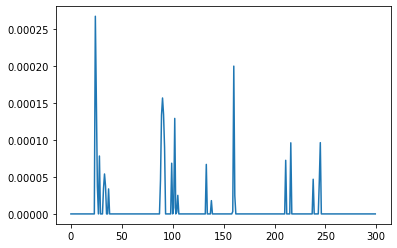

TensorShape([300, 128])

In [12]:
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

guide_grads_example = guided_grads[:,0]
plt.plot(guide_grads_example) 
plt.show() 

guided_grads.shape

## Guided grads average 

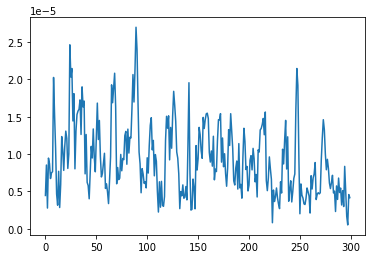

In [39]:
guided_grads_average = tf.reduce_mean(guided_grads, axis=(1))
plt.plot(guided_grads_average) 
plt.show()


## Get weight averaging guide gradients

weights shape (128,)
min 0.0
max 2.6394893e-05


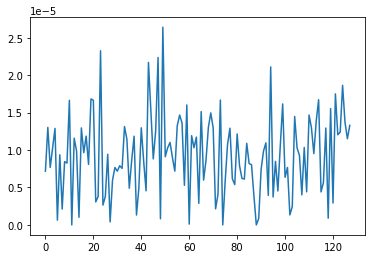

In [40]:
weights = tf.reduce_mean(guided_grads, axis=(0))

print("weights shape", weights.shape) 
print("min", np.min(weights))
print("max", np.max(weights))

plt.plot(weights) 
plt.show() 

## Build a ponderated map of filters according to gradients importance

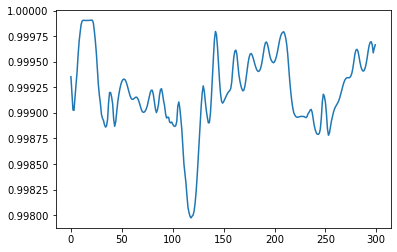

min 0.997973
max 0.9999061


In [41]:
cam = np.ones(output.shape[0], dtype = np.float32)
for i, w in enumerate(weights):
    cam += w * output[:, i]
    
plt.plot(cam) 
plt.show() 

print("min", np.min(cam))
print("max", np.max(cam))


## Normalize cam values

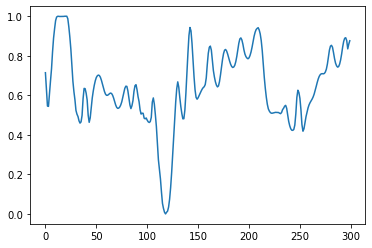

In [42]:
cam_norm = np.maximum(cam, 0)
heatmap = (cam_norm - cam_norm.min()) / (cam_norm.max() - cam_norm.min())

plt.plot(heatmap) 

## Verify cam values against original beat 

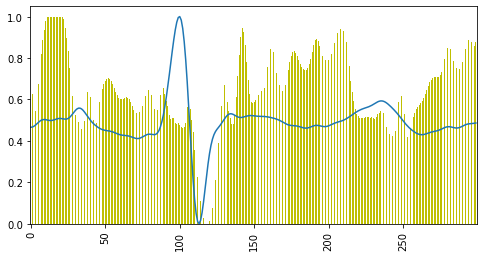

In [23]:
beat = (original_beat - original_beat.min()) / (original_beat.max() - original_beat.min())


fig, ax1 = plt.subplots(figsize=(8, 4))

import matplotlib.ticker as ticker
pd.DataFrame(beat)[0].plot(kind='line')
pd.DataFrame(heatmap)[0].plot(kind='bar', color='y')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show() 

